In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1 features)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

In [3]:
def linregression_GD(X,y,learning_rate, n_epochs = 100, test_data = None):
    '''
    linear regression with Gradient Descent
    
    INPUT: 
    - the feature matrix X
    - the target vector y
    - learning rate
    - epochs: number of Gradient Descent iterations (default 100)
    - test_data (optional): data (X_test,y_test) for monitoring overfitting
    
    OUTPUT:
    - the vector theta
    - mean squared error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    theta = np.random.randn(n) # random initialization
    
    # initialize mse vector 
    mse = np.zeros(n_epochs)

    # initialize mse_test vector (if test_data is not None)
    if test_data: 
        X_test,y_test = test_data
        mse_test = np.zeros(n_epochs)
        
    
    
    # gradient descent iterations
    for epoch in range(n_epochs):
        gradient = 2*X.T.dot(X.dot(theta)-y) # gradient 
        theta = theta - learning_rate*gradient # update the vector theta
        # compute mean squared error 
        mse[epoch] = np.mean((y-X.dot(theta))**2)
        # compute test mean squared error
        if test_data:
            mse_test[epoch] = np.mean((y_test-X_test.dot(theta))**2)
            
            
    results = {}
    results['theta'] = theta
    results['mse'] = mse
    if test_data:
        results['mse_test'] = mse_test
    return results

# Early Stopping of Gradient Descent

In machine learning, **early stopping** is a form of **regularization** used to avoid overfitting.
As soon as the test error reaches a minimum, we will stop Gradient Descent.

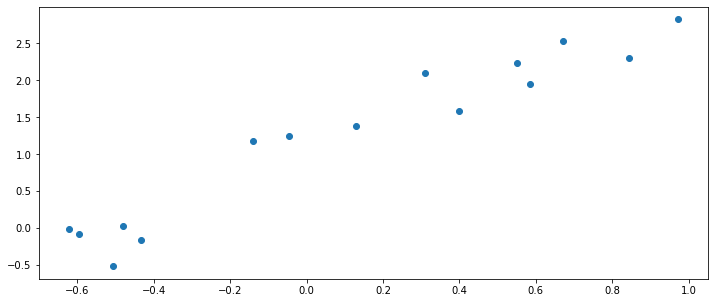

In [4]:
# generate and plot a toy dataset
m = 15
x = -1 + 2*np.random.rand(m)
y = 2*x+1 + 0.25*np.random.randn(m)

plt.figure(figsize=(12,5))
plt.plot(x,y,'o')

In [5]:
# split data into training and test sets
m = len(x)
x_train,y_train = x[0:3*m//4],y[0:3*m//4]
x_test,y_test = x[3*m//4:m],y[3*m//4:m]
m_train = len(y_train)
m_test = len(y_test)

In [6]:
len(x_train)

11

In [7]:
d = 11
X_train = build_poly_features(x_train,degree=d)
X_test = build_poly_features(x_test,degree=d)

## Linear Regression (without gradient descent)

In [8]:
theta = np.linalg.lstsq(X_train,y_train,rcond=None)[0]

mse training set  0.0
mse testing set  11.19


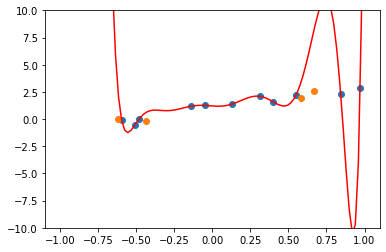

In [9]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
X_plot = build_poly_features(x_plot,degree=d)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,color='red')

plt.ylim([-10,10])

mse_train = np.mean((y_train-X_train.dot(theta))**2)
mse_test = np.mean((y_test-X_test.dot(theta))**2)
print('mse training set ', mse_train.round(2))
print('mse testing set ', mse_test.round(2))

## Linear Regression with gradient descent

In [10]:
# Gradient Descent
results = linregression_GD(X_train,y_train, 
                           n_epochs = 5000, 
                           learning_rate = 0.01, 
                           test_data = (X_test,y_test))

In [11]:
theta = results['theta']
mse_train = results['mse']
mse_test = results['mse_test']

Text(0.5, 1.0, 'Mean Squared Error')

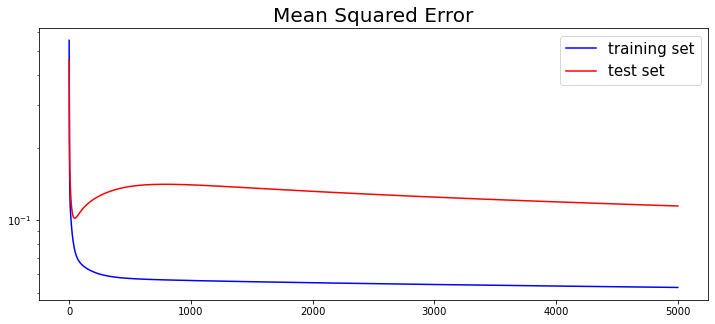

In [12]:
plt.figure(figsize=(12,5))
plt.semilogy(mse_train, color='blue', label = 'training set')
plt.semilogy(mse_test, color='red', label = 'test set')
plt.legend(fontsize=15)
plt.title('Mean Squared Error', fontsize=20)

In [13]:
# Gradient Descent
results = linregression_GD(X_train,y_train, 
                           n_epochs = 500, 
                           learning_rate = 0.01, 
                           test_data = (X_test,y_test))

mse training set  0.05
mse testing set  0.11


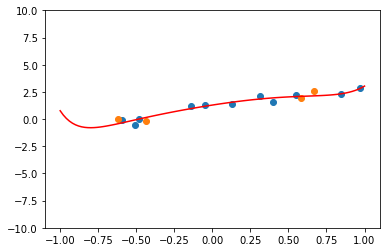

In [14]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
X_plot = build_poly_features(x_plot,degree=d)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,color='red')

plt.ylim([-10,10])

mse_train = np.mean((y_train-X_train.dot(theta))**2)
mse_test = np.mean((y_test-X_test.dot(theta))**2)
print('mse training set ', mse_train.round(2))
print('mse testing set ', mse_test.round(2))